In [91]:
import csv
import pandas as pd
import numpy as np
import os 
import pathlib
import xml.etree.ElementTree as ET
import xarray as xr
import codecs

In [86]:
#先从海浪数据中提取出经纬度，时间，风，海浪高度
# 解析单个文件，并存于字典内
def batch_readxmlfiles(read_file:str):
    parser = ET.XMLParser(encoding="iso-8859-5")
    #print(read_file)
    Tree = ET.parse(read_file,parser=parser)
    header=[]
    row=[]
    root = Tree.getroot()
    #print(root.tag)
    dict_temp={}
    time_node = root.find('./BuoyageRpt/DateTime')
    #print(time_node.tag)
    dict_temp["time"] = time_node.get("DT")
    location_node = root.find('./BuoyageRpt/BuoyInfo/Location')
    dict_temp["longitude"] = location_node.get("longitude")
    dict_temp["latitude"] = location_node.get("latitude")
    BD_node = root.find('./BuoyageRpt/HugeBuoyData/BuoyData')
    dict_temp["WS"] = BD_node.get("WS")
    dict_temp["YBG"] = BD_node.get("YBG") 
    return dict_temp

In [87]:
dict_list = batch_readxmlfiles('2023/01/202301010000MF01001.dat.xml')
print(dict_list)

{'time': '202301010000', 'longitude': '120Ёу35.72ЁфE', 'latitude': '39Ёу30.02ЁфN', 'WS': '6.8', 'YBG': '1.3'}


In [ ]:
def batch_read_fubs(read_path:str):
    """
        + 25-04-12 
        step1:读取指定目录下的所有文件
        step2:读取对应的经纬度
        step3:将经纬度 度分秒的形式 -> 小数
        step4:将每一个时刻的xml文件对应的位置创建为一个字典或对象，生成一整年的数组
    """
    pass

In [88]:
def batch_path_files_reader(read_path:str):
    path=pathlib.Path(read_path)
    files=path.rglob('*.xml')
    dict_list=[]
    for temp_file in files:
        # print(temp_file)
        temp_file_path=str(temp_file)
        temp_dict=batch_readxmlfiles(temp_file_path)
        dict_list.append(temp_dict)
    return dict_list

In [85]:
read_path_alls=[r'./fub/MF01001', r'./fub/MF01002',r'./fub/MF02001']
print(read_path_alls)

['./fub/MF01001', './fub/MF01002', './fub/MF02001']


In [ ]:
#递归遍历文件夹，找出指定文件，调用函数解析
    
    

def batch_path_reader(dirdeep,read_path_alls):
    read_path_alls_path=pathlib.Path(read_path_alls)
    read_paths=read_path_alls_path.iterdir()

    for read_path in read_paths:

        if os.path.isdir(read_path):
            dirdeep=dirdeep+1
            if dirdeep == 1:
                if os.path.exists(str(read_path)+"_local.csv"):
                    os.remove(str(read_path)+"_local.csv")
                    print(f"文件已成功删除。")
                batch_path_reader(dirdeep,read_path)

            if dirdeep == 2:
                dict_list=[]               
                print(dirdeep)
                print("here2")
                print(read_path)
                csvfile_name=os.path.split(read_path)[0]+"_"+os.path.split(read_path)[1]
                print(csvfile_name)
                dict_list=batch_path_files_reader(read_path)
                df = pd.DataFrame(dict_list)
                df.fillna(0)
                df.set_index('time',inplace=True)
                #df.to_csv(csvfile_name+".csv", index=True, encoding='utf-8')
                print(df.head(5))
                try:
                    with open(os.path.split(read_path)[0]+"_local.csv", 'a', newline='') as file:
                        df.to_csv(os.path.split(read_path)[0]+"_local.csv", mode='a', header=not file.tell())
                        print(f"数据已成功追加")
                except FileNotFoundError:
                    # 如果文件不存在，则创建新文件并写入数据，同时写入表头
                    df.to_csv(os.path.split(read_path)[0]+"_local.csv")
                    print(f"文件 不存在，已创建并写入数据")
                except Exception as e:
                    print(f"发生错误: {e}")    
            dirdeep=dirdeep-1

        else:
            continue

            
            
for read_path_all in read_path_alls:
    dirdeep=0
    df_year = pd.DataFrame()
    print(read_path_all)
    batch_path_reader(dirdeep,read_path_all)

./fub/MF01001
文件已成功删除。
2
here2
fub\MF01001\2023\01
fub\MF01001\2023_01
                  longitude      latitude   WS  YBG
time                                               
202301010000  120Ёу35.72ЁфE  39Ёу30.02ЁфN  6.8  1.3
202301010100  120Ёу35.72ЁфE  39Ёу30.02ЁфN  5.7  1.2
202301010200  120Ёу35.72ЁфE  39Ёу30.02ЁфN  4.6  1.1
202301010300  120Ёу35.72ЁфE  39Ёу30.02ЁфN  4.9  0.8
202301010400  120Ёу35.73ЁфE  39Ёу30.04ЁфN  4.4  0.8
数据已成功追加
2
here2
fub\MF01001\2023\02
fub\MF01001\2023_02
                  longitude      latitude    WS  YBG
time                                                
202302010000  120Ёу35.73ЁфE  39Ёу30.05ЁфN   7.4  0.5
202302010100  120Ёу35.73ЁфE  39Ёу30.05ЁфN   7.9  0.6
202302010200  120Ёу35.73ЁфE  39Ёу30.05ЁфN   7.0  0.7
202302010300  120Ёу35.73ЁфE  39Ёу30.04ЁфN  10.5  0.8
202302010400  120Ёу35.73ЁфE  39Ёу30.04ЁфN  14.5  1.8
数据已成功追加
2
here2
fub\MF01001\2023\03
fub\MF01001\2023_03
                  longitude      latitude   WS  YBG
time                          

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

fub\MF01001\2023_local.csv


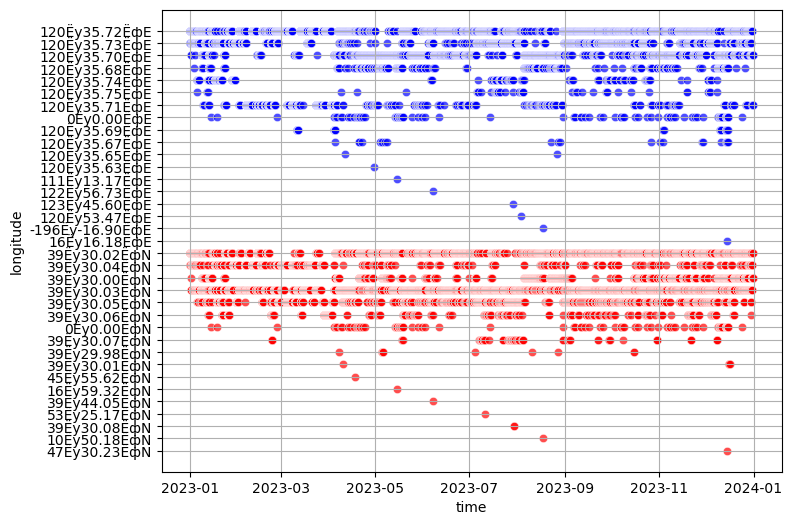

fub\MF01001\2024_local.csv


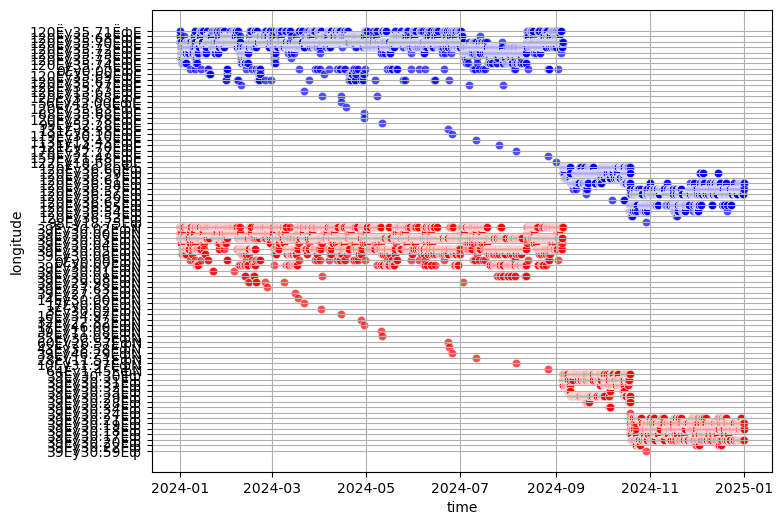

fub\MF01001\2025_local.csv


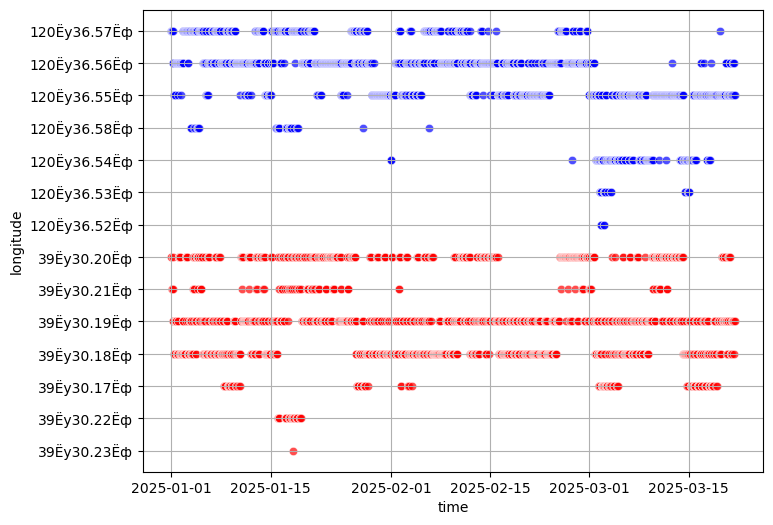

fub\MF01002\2023_local.csv


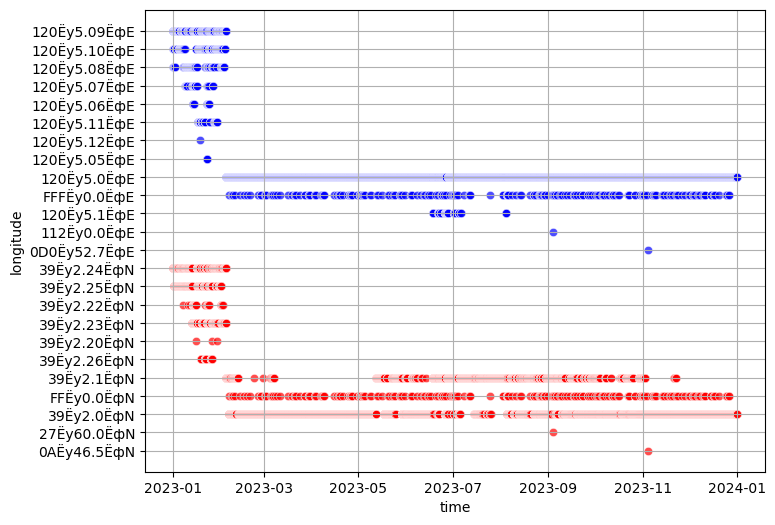

fub\MF01002\2024_local.csv


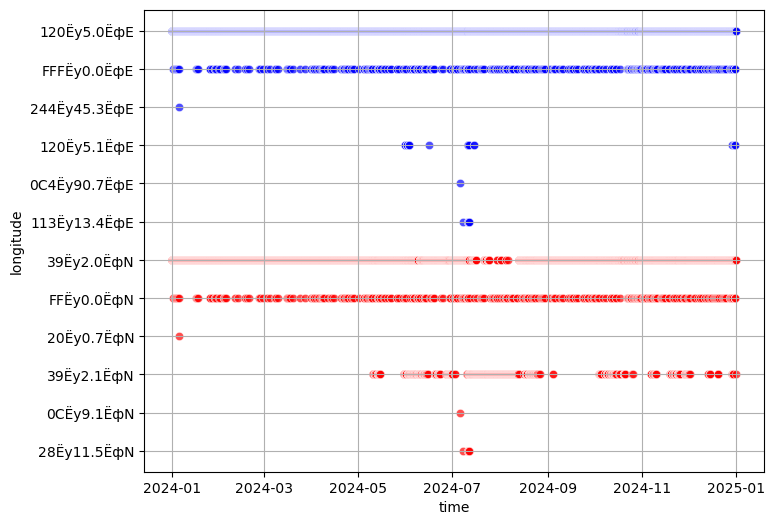

fub\MF01002\2025_local.csv


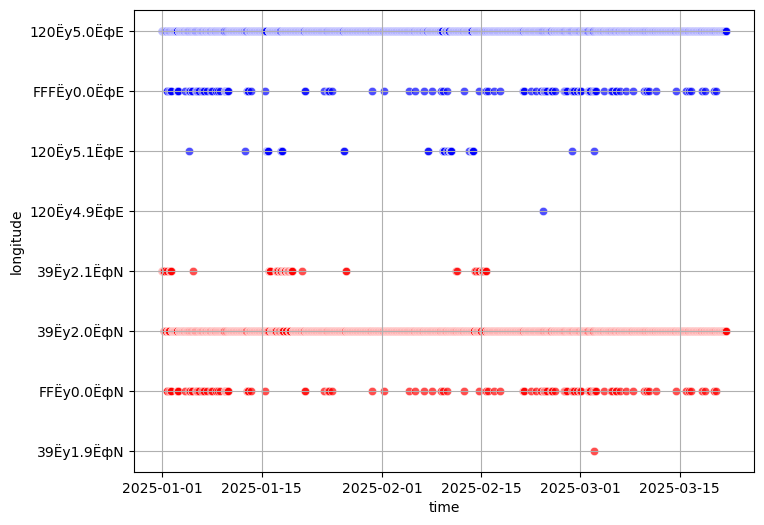

fub\MF02001\2023_local.csv


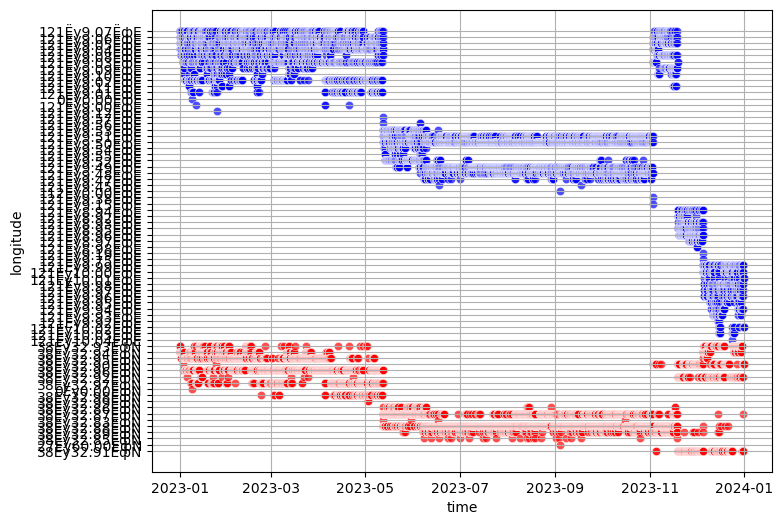

fub\MF02001\2024_local.csv


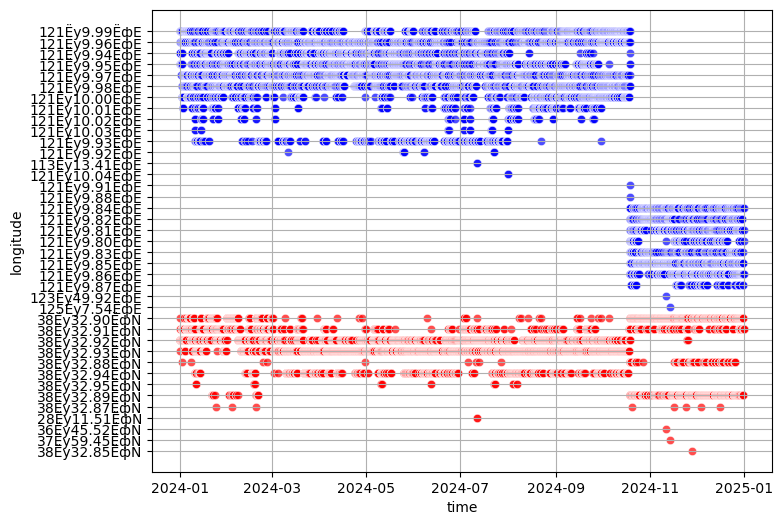

fub\MF02001\2025_local.csv


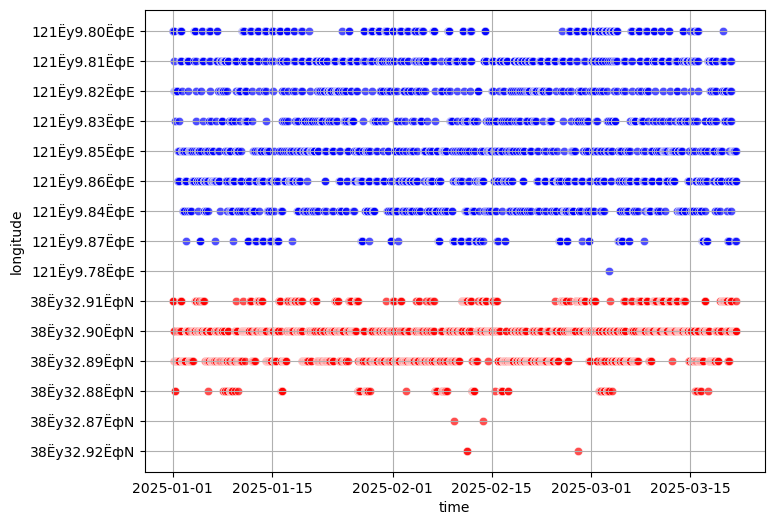

In [98]:
#根据经纬度画图

#读取文件

# 要读取的 CSV 文件所在目录
csv_directory = r'./fub'  


# 读取目录下的所有 CSV 文件
csv_files = pathlib.Path(csv_directory).rglob('*_local.csv')
#df = pd.DataFrame('')
for csv_file in csv_files:
    #if '_' not in str(csv_file):
    print(csv_file)
    csv_data = pd.read_csv(csv_file)
    csv_data['time'] = pd.to_datetime(csv_data['time'],format='%Y%m%d%H%M')
    plt.figure(figsize=(8, 6)) 
    #print(df_data['BG'].max())
    #plt.ylim(0, 10)
    sns.scatterplot(x='time', y='longitude', data=csv_data, color='blue', alpha=0.7)
    sns.scatterplot(x='time', y='latitude', data=csv_data, color='red', alpha=0.7)

    plt.grid(True)
    plt.show()
        

In [ ]:
#file_path = r'Z:\风场数据\GRAPES\2024\GRAPES_2024010100_240h_UV.nc'
file_path = r'GRAPES_2024010100_240h_UV.nc'

def batch_readncfiles(read_file:str):
    ds = xr.open_dataset(read_file)
    file_name = os.path.split(read_file)[1]
    time = str(file_name).split('_')[1]
    print(time)
    #file_name = os.path.split(read_file)[0]+"_"+os.path.split(read_path)[1]
    # 查看数据集的基本信息
    #print("数据集基本信息：")
    #ds.info()

    # 查看数据集中包含的变量
    print("\n数据集中的变量：")
    for var_name in ds.data_vars:
        print(var_name)
    print("\n数据集中的维度：")    
    for dim_name in ds.dims:
        print(dim_name)
    
    #指定经纬坐标，取得时间维度的数据
    time_ds =  ds.sel(longitude='120',latitude='39', method='nearest') 
    
    # 获取剩余维度（这里是 time）和变量值
    time_dim = list(time_ds.dims.keys())[0] 
    print(time_dim)
    remaining_dim_values = time_ds[time_dim].values
    UGRD_values = time_ds['UGRD_10maboveground'].values
    VGRD_values = time_ds['VGRD_10maboveground'].values

    # 创建 DataFrame
    df = pd.DataFrame({
        'time_point': time,
        time: remaining_dim_values,
        'UGRD_10maboveground': UGRD_values,
        'VGRD_10maboveground': VGRD_values
    })
    
    print(df)
    return df
       
    #print(time_uv)
        
        
    #for var_name, var in ds.data_vars.items():
        #print(f"变量名: {var_name}")
        #print("变量值:")
        #print(var.values)
        #print("-" * 50)

    #type(ds)
    # 读取特定变量的数据
    #var = ds['dimensions']
    #print("\n特定变量的数据内容：")
    #print(var.values)

    # 关闭数据集
    #ds.close()
    
    
batch_readncfiles(file_path)

2024010100

数据集中的变量：
UGRD_10maboveground
VGRD_10maboveground

数据集中的维度：
time
latitude
longitude
time
                  time  UGRD_10maboveground  VGRD_10maboveground
0  2024-01-01 00:00:00             2.199523            -1.037262
1  2024-01-01 03:00:00             4.761143             1.506215
2  2024-01-01 06:00:00             6.345787             2.872518
3  2024-01-01 09:00:00             6.070305             3.430275
4  2024-01-01 12:00:00             6.218267             3.359379
..                 ...                  ...                  ...
56 2024-01-10 00:00:00            -1.384164             1.336539
57 2024-01-10 06:00:00            -0.392447             1.730844
58 2024-01-10 12:00:00             0.773010             3.449006
59 2024-01-10 18:00:00             5.650651             2.570885
60 2024-01-11 00:00:00             5.795973             0.243707

[61 rows x 3 columns]


C:\Users\vicky\AppData\Local\Temp\ipykernel_4192\1173676195.py:26: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  remaining_dim = list(time_ds.dims.keys())[0]


,time,UGRD_10maboveground,VGRD_10maboveground
0,2024-01-01 00:00:00,2.199523,-1.037262
1,2024-01-01 03:00:00,4.761143,1.506215
2,2024-01-01 06:00:00,6.345787,2.872518
3,2024-01-01 09:00:00,6.070305,3.430275
4,2024-01-01 12:00:00,6.218267,3.359379
...,...,...,...
56,2024-01-10 00:00:00,-1.384164,1.336539
57,2024-01-10 06:00:00,-0.392447,1.730844
58,2024-01-10 12:00:00,0.773010,3.449006
59,2024-01-10 18:00:00,5.650651,2.570885


In [22]:
variable_names = ds.keys()
print(variable_names)

NameError: name 'ds' is not defined

In [ ]:

    # 读取特定变量的数据
    var = ds['your_variable_name']
    print("\n特定变量的数据内容：")
    #print(var.values)

    # 关闭数据集
    ds.close()
    
    
batch_readfiles(file_path)

In [9]:
#定义读取单个文件方法
# 解析单个文件，并存于字典内
def batch_readfiles(read_file:str):
    parser = ET.XMLParser(encoding="iso-8859-5")
    #print(read_file)
    Tree = ET.parse(read_file,parser=parser)
    header=[]
    row=[]
    root = Tree.getroot()
    #print(root.tag)
    dict_temp={}
    time_node = root.find('./BuoyageRpt/DateTime')
    #print(time_node.tag)
    dict_temp["time"] = time_node.get("DT")
    BD_node = root.find('./BuoyageRpt/HugeBuoyData/BuoyData')
    keys=BD_node.keys()
    for key in keys:
        temp_val=BD_node.get(key)
        dict_temp[key]=temp_val
    return dict_temp

def batch_path_files_reader(read_path:str):
    path=pathlib.Path(read_path)
    files=path.rglob('*.xml')
    dict_list=[]
    for temp_file in files:
        # print(temp_file)
        temp_file_path=str(temp_file)
        temp_dict=batch_readfiles(temp_file_path)
        dict_list.append(temp_dict)
    return dict_list

In [ ]:
#读取风场数据
